In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as pyplot
import os


**Split the dataset**

In [ ]:
import os
import shutil
import random

def split_dataset(dataset_path, output_path, train_ratio=0.6, val_ratio=0.2, test_ratio=0.2):

    train_dir = os.path.join(output_path, "train")
    val_dir = os.path.join(output_path, "val")
    test_dir = os.path.join(output_path, "test")
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if not os.path.isdir(class_path):
            continue

        files = os.listdir(class_path)
        random.shuffle(files)

        total_files = len(files)
        train_end = int(total_files * train_ratio)
        val_end = train_end + int(total_files * val_ratio)

        # Split files
        train_files = files[:train_end]
        val_files = files[train_end:val_end]
        test_files = files[val_end:]

        # Copying to directories
        for file in train_files:
            src = os.path.join(class_path, file)
            dest = os.path.join(train_dir, class_name)
            os.makedirs(dest, exist_ok=True)
            shutil.copy(src, dest)

        for file in val_files:
            src = os.path.join(class_path, file)
            dest = os.path.join(val_dir, class_name)
            os.makedirs(dest, exist_ok=True)
            shutil.copy(src, dest)

        for file in test_files:
            src = os.path.join(class_path, file)
            dest = os.path.join(test_dir, class_name)
            os.makedirs(dest, exist_ok=True)
            shutil.copy(src, dest)

dataset_path = "C:/Users/HPA02532Y/Documents/GitHub/Wasteclassifier/RealWaste"
output_path = "C:/Users/HPA02532Y/Documents/GitHub/Wasteclassifier/Data"
split_dataset(dataset_path, output_path)


In [34]:
import tensorflow as tf

# Paths to your dataset folders
train_dir = "/content/drive/MyDrive/Data/train"
val_dir = "/content/drive/MyDrive/Data/val"
test_dir = "/content/drive/MyDrive/Data/test"

# Load the datasets with integer labels
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(524, 524),  # Resize images to this size
    batch_size=32,          # Number of images per batch
    label_mode='int'        # Use integer labels for sparse_categorical_crossentropy
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(524, 524),
    batch_size=32,
    label_mode='int'
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(524, 524),
    batch_size=32,
    label_mode='int'
)

# Normalize pixel values (0 to 1)
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))


Found 2848 files belonging to 9 classes.
Found 949 files belonging to 9 classes.
Found 955 files belonging to 9 classes.


In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(524, 524, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(9, activation='softmax')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 524, 524, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 262, 262, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 262, 262, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 262, 262, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 131, 131, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 131, 131, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 131, 131, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 65, 65, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 65, 65, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 270400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │      17,305,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,329,833 (66.11 MB)

 Trainable params: 17,329,833 (66.11 MB)

 Non-trainable params: 0 (0.00 B)

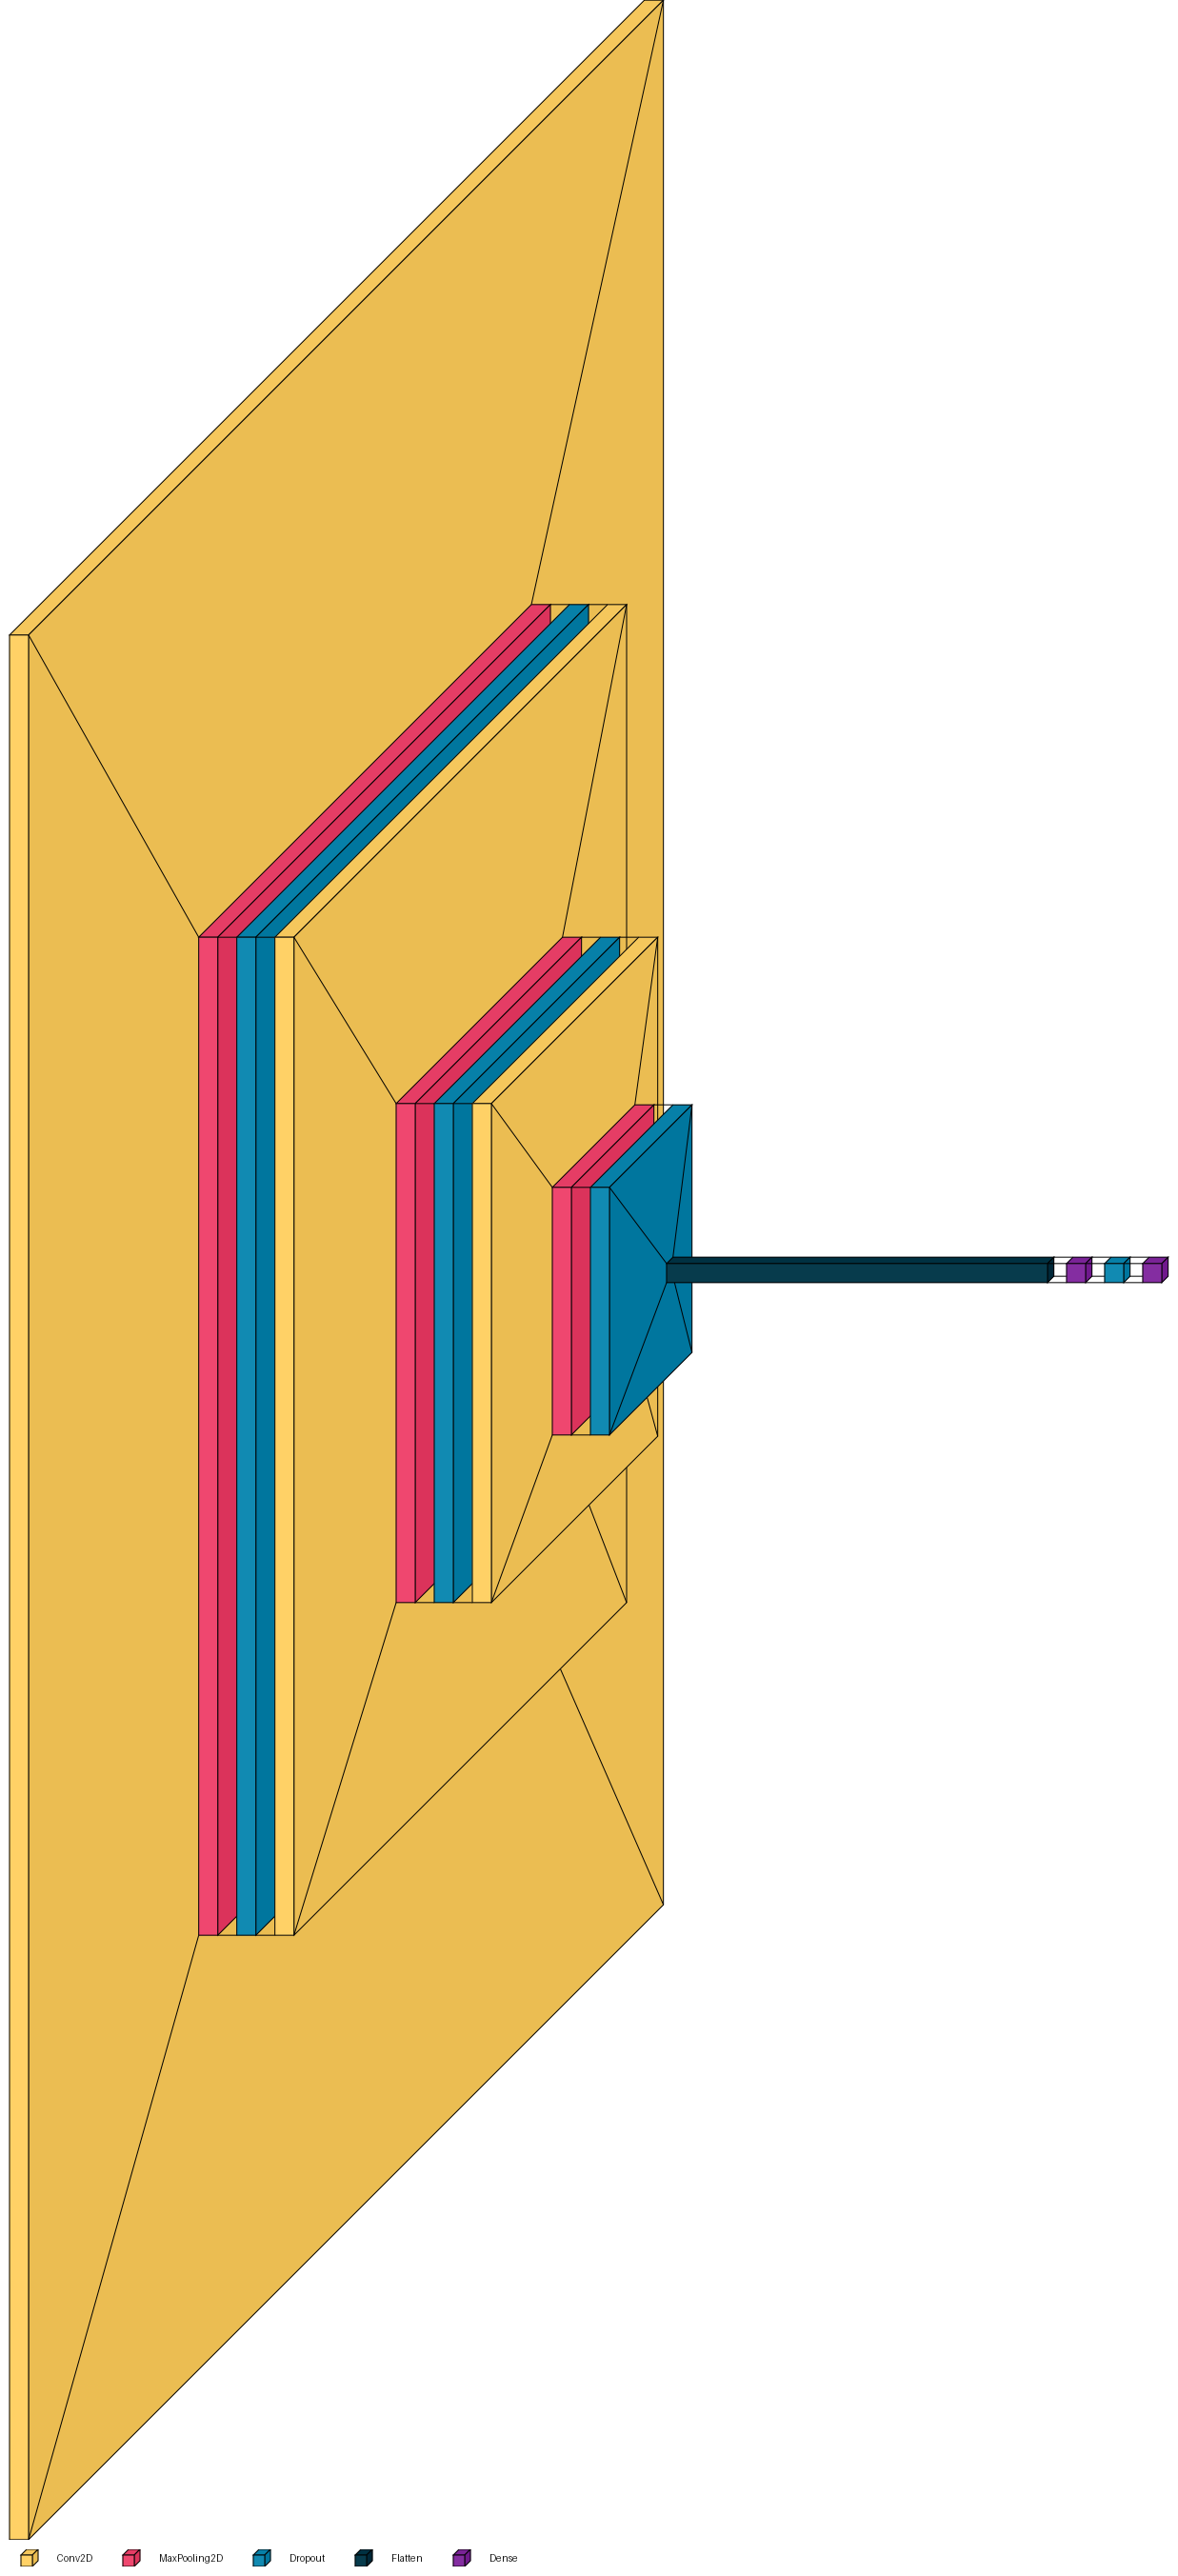

In [26]:
import visualkeras
visualkeras.layered_view(model, legend=True, spacing=20)

In [27]:
#Learning Rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_1 = model.fit(train_dataset, validation_data=val_dataset, epochs=20, callbacks=[early_stopping])

Epoch 1/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 46s 346ms/step - accuracy: 0.1474 - loss: 5.4964 - val_accuracy: 0.2929 - val_loss: 2.0773
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 62s 274ms/step - accuracy: 0.2499 - loss: 2.0362 - val_accuracy: 0.3203 - val_loss: 2.0155
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 23s 261ms/step - accuracy: 0.2939 - loss: 1.9594 - val_accuracy: 0.3404 - val_loss: 1.9409
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 40s 253ms/step - accuracy: 0.3337 - loss: 1.8286 - val_accuracy: 0.3604 - val_loss: 1.8842
Epoch 5/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 24s 264ms/step - accuracy: 0.3249 - loss: 1.7995 - val_accuracy: 0.3583 - val_loss: 1.7972
Epoch 6/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 24s 268ms/step - accuracy: 0.3722 - loss: 1.7198 - val_accuracy: 0.3667 - val_loss: 1.7643
Epoch 7/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 45s 318ms/step - accuracy: 0.4271 - loss: 1.5566 - val_accuracy: 0.4078 - val_loss: 1.7018
Epoch 8/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 315ms/step - accuracy: 0.4372 - loss: 1.5067 - val_accu

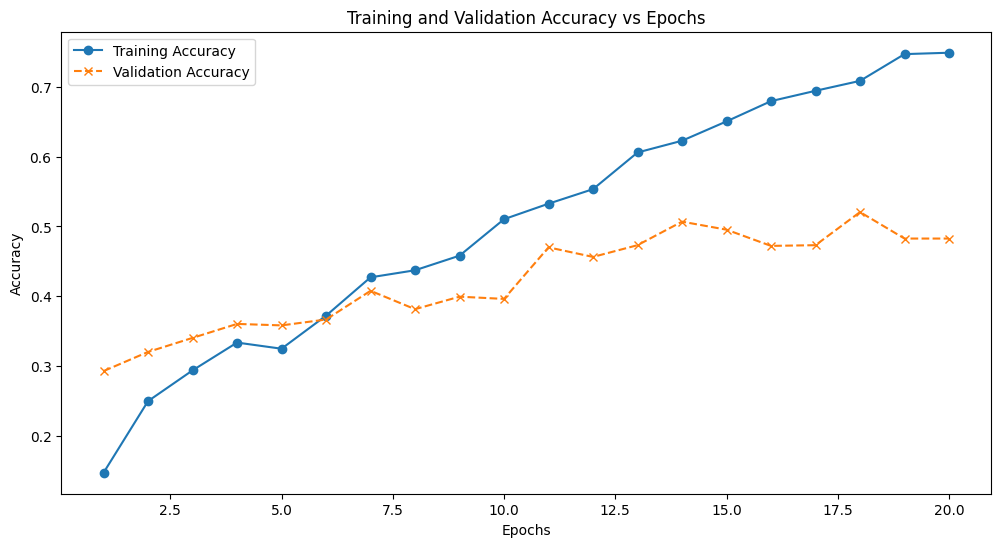

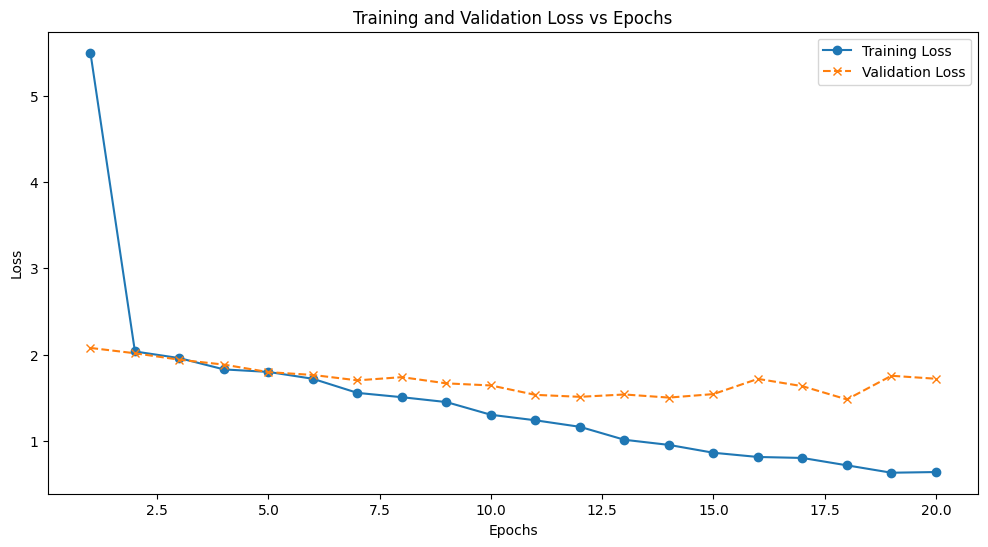

In [8]:
# Data extracted from the training logs
epochs = list(range(1, 21))
accuracy = [
    0.1474, 0.2499, 0.2939, 0.3337, 0.3249,
    0.3722, 0.4271, 0.4372, 0.4581, 0.5103,
    0.5325, 0.5533, 0.6058, 0.6226, 0.6503,
    0.6793, 0.6941, 0.7083, 0.7466, 0.7486
]
val_accuracy = [
    0.2929, 0.3203, 0.3404, 0.3604, 0.3583,
    0.3667, 0.4078, 0.3815, 0.3994, 0.3962,
    0.4700, 0.4563, 0.4731, 0.5068, 0.4953,
    0.4721, 0.4731, 0.5205, 0.4826, 0.4826
]
loss = [
    5.4964, 2.0362, 1.9594, 1.8286, 1.7995,
    1.7198, 1.5566, 1.5067, 1.4502, 1.3031,
    1.2392, 1.1637, 1.0137, 0.9542, 0.8633,
    0.8144, 0.8031, 0.7177, 0.6320, 0.6399
]
val_loss = [
    2.0773, 2.0155, 1.9409, 1.8842, 1.7972,
    1.7643, 1.7018, 1.7389, 1.6669, 1.6428,
    1.5338, 1.5110, 1.5382, 1.5022, 1.5427,
    1.7188, 1.6345, 1.4809, 1.7549, 1.7205
]

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='x', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epochs')
plt.legend()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='x', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs Epochs')
plt.legend()
plt.show()


30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 283ms/step - accuracy: 0.5372 - loss: 1.5772
Test Accuracy: 55.39%
Test Loss: 1.5342
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

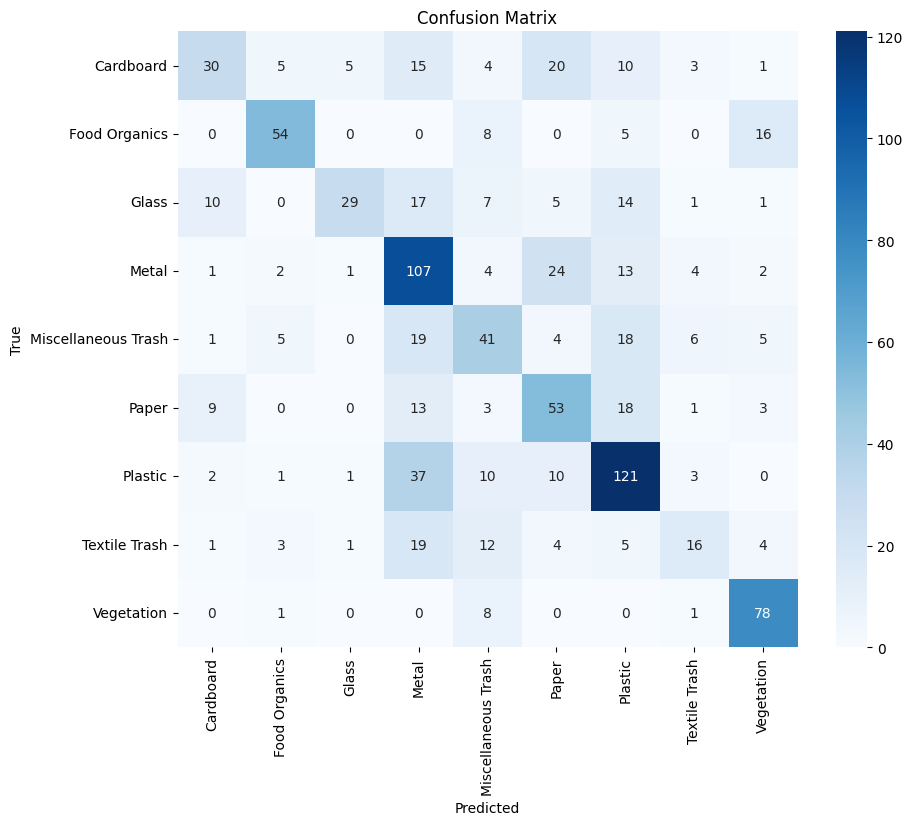


Classification Report:
                     precision    recall  f1-score   support

          Cardboard       0.56      0.32      0.41        93
      Food Organics       0.76      0.65      0.70        83
              Glass       0.78      0.35      0.48        84
              Metal       0.47      0.68      0.56       158
Miscellaneous Trash       0.42      0.41      0.42        99
              Paper       0.44      0.53      0.48       100
            Plastic       0.59      0.65      0.62       185
      Textile Trash       0.46      0.25      0.32        65
         Vegetation       0.71      0.89      0.79        88

           accuracy                           0.55       955
          macro avg       0.58      0.53      0.53       955
       weighted avg       0.57      0.55      0.54       955

Precision (Weighted): 0.57
Recall (Weighted): 0.55


In [29]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Get predictions and true labels
y_pred = []
y_true = []

for images, labels in test_dataset:
    predictions = model.predict(images)  # Predict probabilities
    y_pred.extend(np.argmax(predictions, axis=1))  # Convert probabilities to class labels
    y_true.extend(labels.numpy())  # Use labels directly as they are integers

y_pred = np.array(y_pred)
y_true = np.array(y_true)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_names = ['Cardboard', 'Food Organics', 'Glass', 'Metal', 'Miscellaneous Trash', 'Paper', 'Plastic', 'Textile Trash', 'Vegetation']

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Precision and Recall
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

print(f"Precision (Weighted): {precision:.2f}")
print(f"Recall (Weighted): {recall:.2f}")


In [32]:
#Learning Rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_2 = model.fit(train_dataset, validation_data=val_dataset, epochs=20, callbacks=[early_stopping])

Epoch 1/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 39s 384ms/step - accuracy: 0.1546 - loss: 2.7912 - val_accuracy: 0.1939 - val_loss: 2.1962
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 283ms/step - accuracy: 0.1902 - loss: 2.1959 - val_accuracy: 0.1939 - val_loss: 2.1949
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 28s 317ms/step - accuracy: 0.1936 - loss: 2.1945 - val_accuracy: 0.1939 - val_loss: 2.1936
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 37s 268ms/step - accuracy: 0.1913 - loss: 2.1931 - val_accuracy: 0.1939 - val_loss: 2.1923
Epoch 5/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 23s 253ms/step - accuracy: 0.1968 - loss: 2.1917 - val_accuracy: 0.1939 - val_loss: 2.1909
Epoch 6/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 255ms/step - accuracy: 0.1907 - loss: 2.1905 - val_accuracy: 0.1939 - val_loss: 2.1896
Epoch 7/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 42s 267ms/step - accuracy: 0.1934 - loss: 2.1887 - val_accuracy: 0.1939 - val_loss: 2.1884
Epoch 8/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 23s 255ms/step - accuracy: 0.1940 - loss: 2.1877 - val_accu

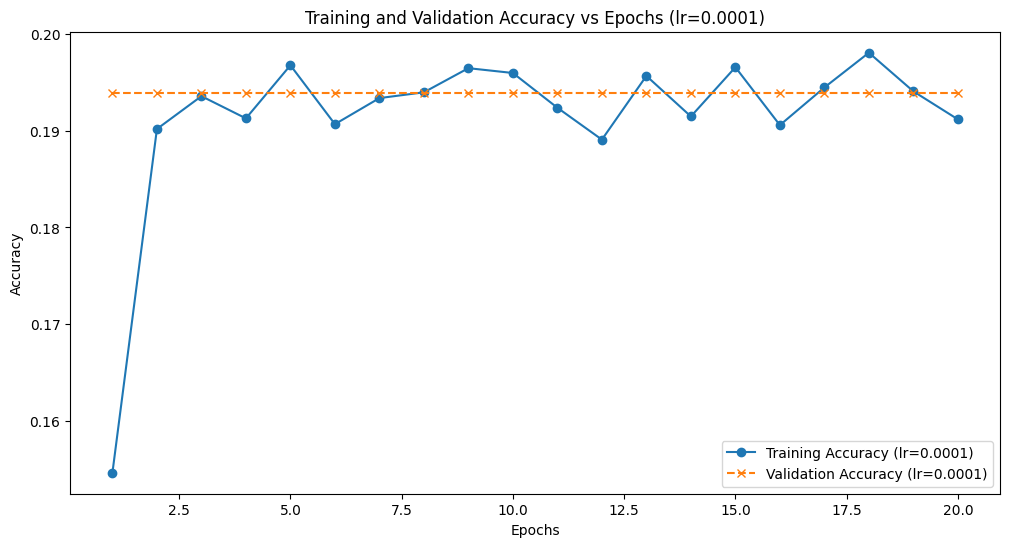

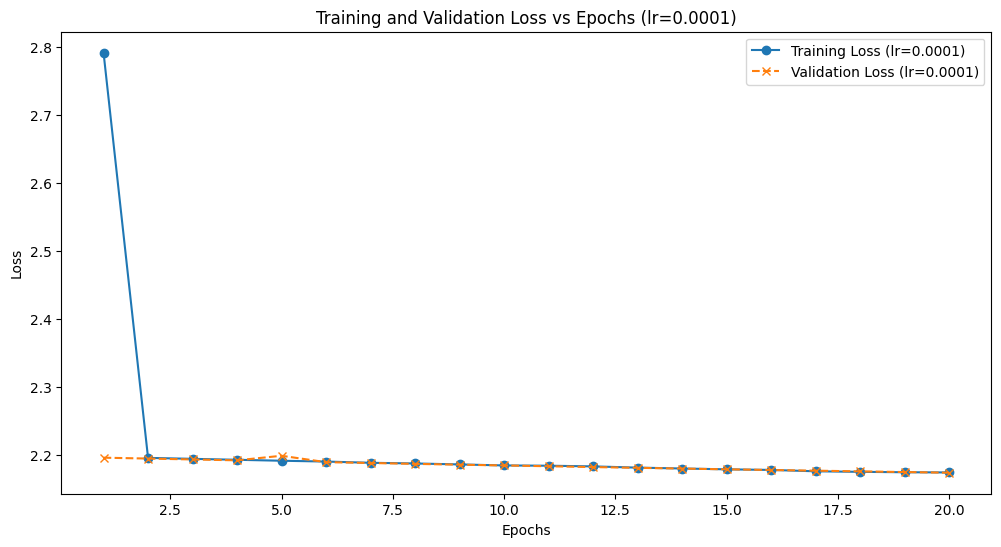

In [9]:
epochs_lr_0001 = list(range(1, 21))
accuracy_lr_0001 = [
    0.1546, 0.1902, 0.1936, 0.1913, 0.1968,
    0.1907, 0.1934, 0.1940, 0.1965, 0.1960,
    0.1924, 0.1891, 0.1957, 0.1915, 0.1966,
    0.1906, 0.1945, 0.1981, 0.1941, 0.1912
]
val_accuracy_lr_0001 = [
    0.1939, 0.1939, 0.1939, 0.1939, 0.1939,
    0.1939, 0.1939, 0.1939, 0.1939, 0.1939,
    0.1939, 0.1939, 0.1939, 0.1939, 0.1939,
    0.1939, 0.1939, 0.1939, 0.1939, 0.1939
]
loss_lr_0001 = [
    2.7912, 2.1959, 2.1945, 2.1931, 2.1917,
    2.1905, 2.1887, 2.1877, 2.1863, 2.1848,
    2.1844, 2.1834, 2.1816, 2.1803, 2.1791,
    2.1782, 2.1762, 2.1754, 2.1748, 2.1745
]
val_loss_lr_0001 = [
    2.1962, 2.1949, 2.1936, 2.1923, 2.1990,
    2.1896, 2.1884, 2.1871, 2.1859, 2.1848,
    2.1836, 2.1824, 2.1813, 2.1802, 2.1791,
    2.1781, 2.1771, 2.1761, 2.1751, 2.1741
]

# Plot Training and Validation Accuracy for learning rate = 0.0001
plt.figure(figsize=(12, 6))
plt.plot(epochs_lr_0001, accuracy_lr_0001, label='Training Accuracy (lr=0.0001)', marker='o')
plt.plot(epochs_lr_0001, val_accuracy_lr_0001, label='Validation Accuracy (lr=0.0001)', marker='x', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epochs (lr=0.0001)')
plt.legend()
plt.show()

# Plot Training and Validation Loss for learning rate = 0.0001
plt.figure(figsize=(12, 6))
plt.plot(epochs_lr_0001, loss_lr_0001, label='Training Loss (lr=0.0001)', marker='o')
plt.plot(epochs_lr_0001, val_loss_lr_0001, label='Validation Loss (lr=0.0001)', marker='x', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs Epochs (lr=0.0001)')
plt.legend()
plt.show()


In [17]:
#Learning Rate = 0.01
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_3 = model.fit(train_dataset, validation_data=val_dataset, epochs=20, callbacks=[early_stopping])

Epoch 1/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 40s 371ms/step - accuracy: 0.1443 - loss: 43.9039 - val_accuracy: 0.1939 - val_loss: 2.1418
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 32s 320ms/step - accuracy: 0.1885 - loss: 2.1423 - val_accuracy: 0.1939 - val_loss: 2.1416
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 28s 315ms/step - accuracy: 0.1915 - loss: 2.1440 - val_accuracy: 0.1939 - val_loss: 2.1418
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 40s 308ms/step - accuracy: 0.1929 - loss: 2.1410 - val_accuracy: 0.1939 - val_loss: 2.1414
Epoch 5/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 28s 317ms/step - accuracy: 0.1896 - loss: 2.1433 - val_accuracy: 0.1939 - val_loss: 2.1413
Epoch 6/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 28s 313ms/step - accuracy: 0.1923 - loss: 2.1435 - val_accuracy: 0.1939 - val_loss: 2.1415
Epoch 7/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 29s 322ms/step - accuracy: 0.1916 - loss: 2.1379 - val_accuracy: 0.1939 - val_loss: 2.1412
Epoch 8/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 28s 315ms/step - accuracy: 0.1917 - loss: 2.1379 - val_acc

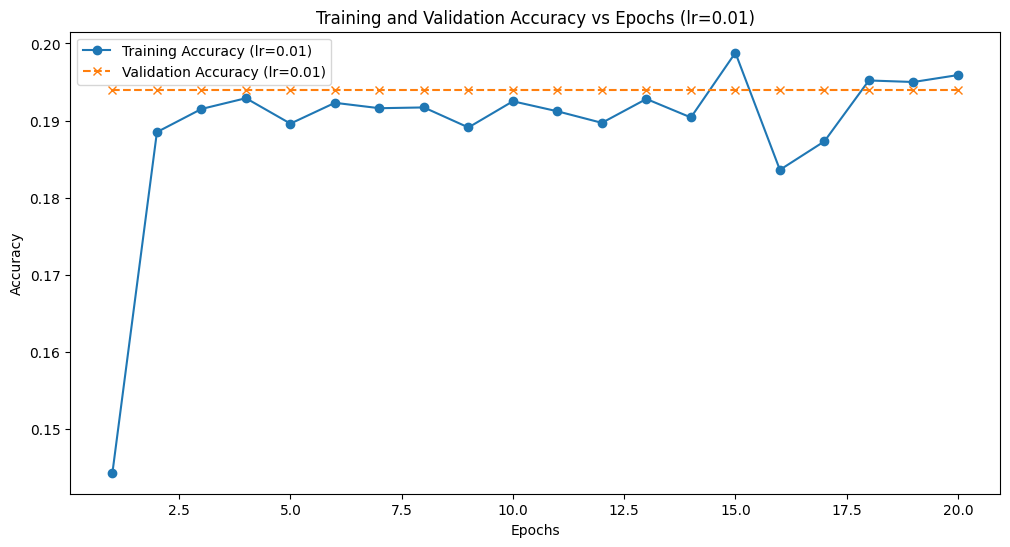

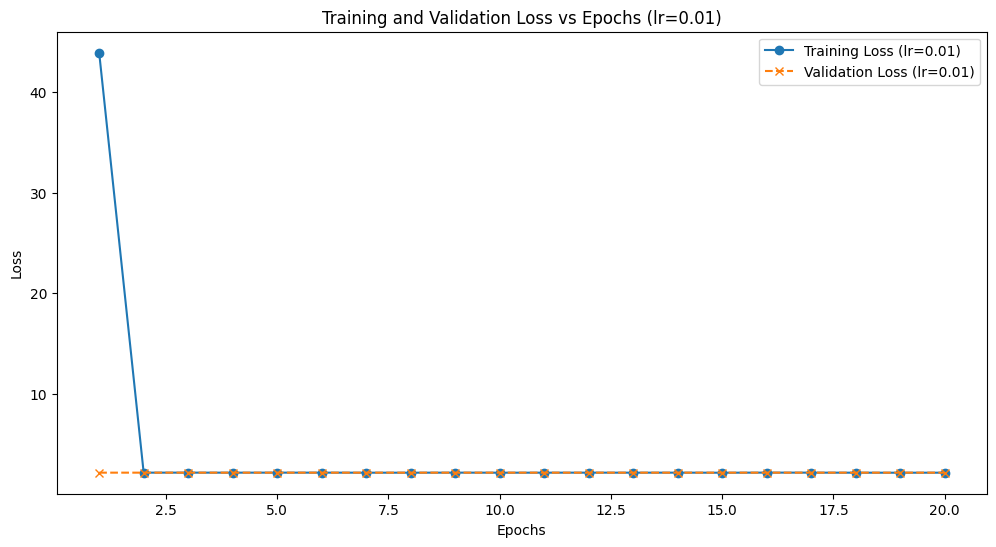

In [10]:
epochs_lr_001 = list(range(1, 21))
accuracy_lr_001 = [
    0.1443, 0.1885, 0.1915, 0.1929, 0.1896,
    0.1923, 0.1916, 0.1917, 0.1891, 0.1925,
    0.1912, 0.1897, 0.1928, 0.1904, 0.1988,
    0.1836, 0.1873, 0.1952, 0.1950, 0.1959
]
val_accuracy_lr_001 = [
    0.1939, 0.1939, 0.1939, 0.1939, 0.1939,
    0.1939, 0.1939, 0.1939, 0.1939, 0.1939,
    0.1939, 0.1939, 0.1939, 0.1939, 0.1939,
    0.1939, 0.1939, 0.1939, 0.1939, 0.1939
]
loss_lr_001 = [
    43.9039, 2.1423, 2.1440, 2.1410, 2.1433,
    2.1435, 2.1379, 2.1379, 2.1435, 2.1381,
    2.1398, 2.1426, 2.1404, 2.1418, 2.1357,
    2.1461, 2.1431, 2.1386, 2.1351, 2.1398
]
val_loss_lr_001 = [
    2.1418, 2.1416, 2.1418, 2.1414, 2.1413,
    2.1415, 2.1412, 2.1412, 2.1413, 2.1413,
    2.1413, 2.1413, 2.1412, 2.1411, 2.1411,
    2.1412, 2.1413, 2.1412, 2.1412, 2.1413
]

# Plot Training and Validation Accuracy for learning rate = 0.01
plt.figure(figsize=(12, 6))
plt.plot(epochs_lr_001, accuracy_lr_001, label='Training Accuracy (lr=0.01)', marker='o')
plt.plot(epochs_lr_001, val_accuracy_lr_001, label='Validation Accuracy (lr=0.01)', marker='x', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epochs (lr=0.01)')
plt.legend()
plt.show()

# Plot Training and Validation Loss for learning rate = 0.01
plt.figure(figsize=(12, 6))
plt.plot(epochs_lr_001, loss_lr_001, label='Training Loss (lr=0.01)', marker='o')
plt.plot(epochs_lr_001, val_loss_lr_001, label='Validation Loss (lr=0.01)', marker='x', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs Epochs (lr=0.01)')
plt.legend()
plt.show()


In [ ]:
#Learning Rate = 0.1
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_4 = model.fit(train_dataset, validation_data=val_dataset, epochs=20, callbacks=[early_stopping])

Epoch 1/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 33s 315ms/step - accuracy: 0.1629 - loss: 4033.3044 - val_accuracy: 0.1939 - val_loss: 2.1520
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 33s 264ms/step - accuracy: 0.1682 - loss: 2.1608 - val_accuracy: 0.1939 - val_loss: 2.1567
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 24s 266ms/step - accuracy: 0.1742 - loss: 2.1641 - val_accuracy: 0.1939 - val_loss: 2.1512
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 24s 273ms/step - accuracy: 0.1760 - loss: 2.1634 - val_accuracy: 0.1939 - val_loss: 2.1503
Epoch 5/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 23s 253ms/step - accuracy: 0.1672 - loss: 2.1623 - val_accuracy: 0.1939 - val_loss: 2.1585
Epoch 6/20
51/89 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step - accuracy: 0.1899 - loss: 2.1611

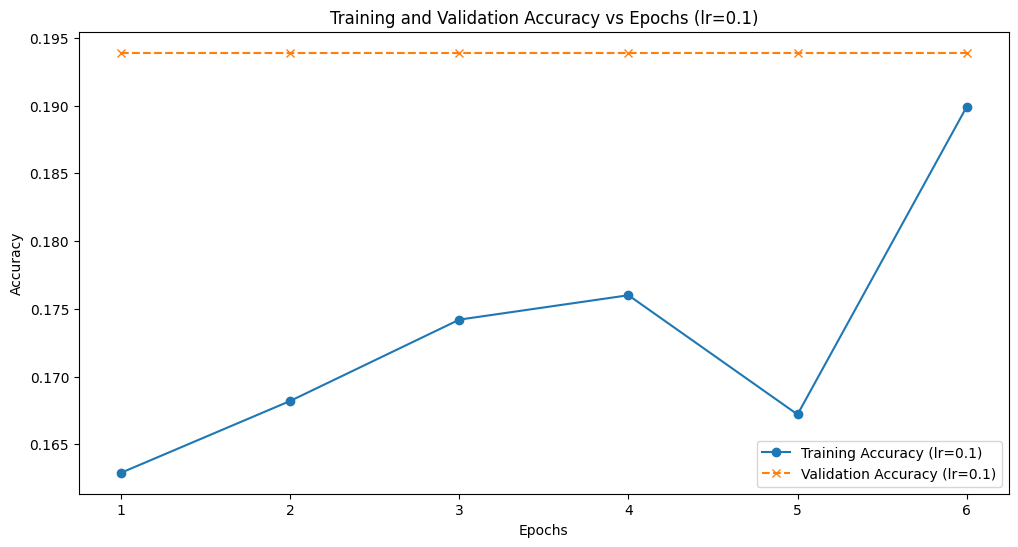

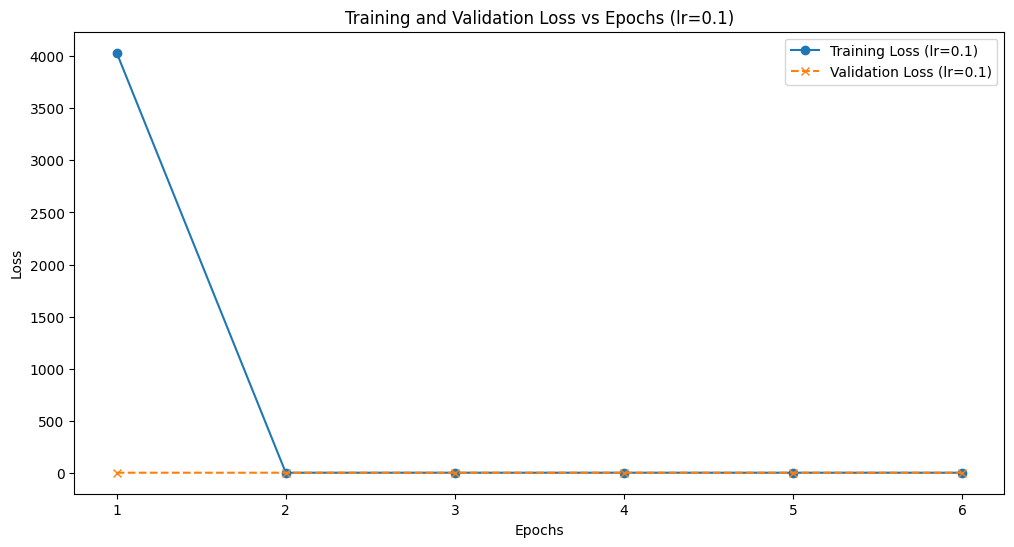

2.15374

In [11]:
# Given data for learning rate = 0.1
epochs_lr_01 = [1, 2, 3, 4, 5, 6]
accuracy_lr_01 = [0.1629, 0.1682, 0.1742, 0.1760, 0.1672, 0.1899]
val_accuracy_lr_01 = [0.1939, 0.1939, 0.1939, 0.1939, 0.1939, 0.1939]
loss_lr_01 = [4033.3044, 2.1608, 2.1641, 2.1634, 2.1623, 2.1611]
val_loss_lr_01 = [2.1520, 2.1567, 2.1512, 2.1503, 2.1585, None]


forecast_val_loss = np.mean(val_loss_lr_01[:-1])  # Use average of available values for missing entries
val_loss_lr_01[-1] = forecast_val_loss

# Plot Training and Validation Accuracy for learning rate = 0.1
plt.figure(figsize=(12, 6))
plt.plot(epochs_lr_01, accuracy_lr_01, label='Training Accuracy (lr=0.1)', marker='o')
plt.plot(epochs_lr_01, val_accuracy_lr_01, label='Validation Accuracy (lr=0.1)', marker='x', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epochs (lr=0.1)')
plt.legend()
plt.show()

# Plot Training and Validation Loss for learning rate = 0.1
plt.figure(figsize=(12, 6))
plt.plot(epochs_lr_01, loss_lr_01, label='Training Loss (lr=0.1)', marker='o')
plt.plot(epochs_lr_01, val_loss_lr_01, label='Validation Loss (lr=0.1)', marker='x', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs Epochs (lr=0.1)')
plt.legend()
plt.show()

forecast_val_loss
